<a href="https://colab.research.google.com/github/Karimkh31/FDS_HS22/blob/main/SkeletonMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 3: MNIST

This is the first task of Practical 3. Your task is to build a (convolutional) neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 

You should get an accuracy of **at least 97%** to pass the practical. 

The model files might be too large to be uploaded to GitHub. 
Please use the following link to upload your models: https://seafile.ifi.uzh.ch/u/d/695f63e725b641ed8633/

Name the model file `{repository_name}-MNIST.h5`. For example, if your repository is FDS22-M0, you should name the model file `FDS22-M0-MNIST.h5`. If you are not satisfied with the model you have uploaded, you can upload a new one with the same name. We will only look at the newest model. Nevertheless, try to upload as few times as possible, since the online drive has a limited amount of space. 

## Import the libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [36]:
tf.__version__

'2.9.2'

In [37]:
tf.keras.__version__

'2.9.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

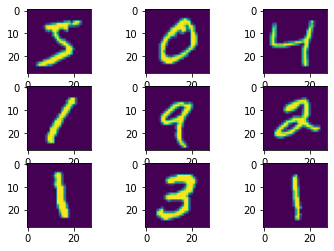

(60000, 28, 28)
(10000, 28, 28)
(60000,)
5


In [38]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

print(X_train_full.shape)
print(X_test.shape)

print(y_train_full.shape)
print(y_train_full[0])

In [39]:
y_train_full = keras.utils.to_categorical(y_train_full, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# normalisation
X_train_full = X_train_full/255.0
X_test = X_test/255.0


np.random.seed(42) 
shuffled_indices = np.random.permutation(X_train_full.shape[0])
X_valid, X_train = X_train_full[shuffled_indices[:5000]], X_train_full[shuffled_indices[5000:]]
y_valid, y_train = y_train_full[shuffled_indices[:5000]], y_train_full[shuffled_indices[5000:]]


In [40]:
y_train_full[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Build and train the model

Build and train your model. 

In [41]:
# TODO: Build your model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))



model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.BatchNormalization()) 

model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(10, activation="softmax"))

#model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=["accuracy"])


history = model.fit(X_train, y_train, batch_size=30, epochs=10, validation_data=(X_valid, y_valid))



Epoch 1/10
1834/1834 [==============================] - 10s 5ms/step - loss: 0.6072 - accuracy: 0.8078 - val_loss: 0.1966 - val_accuracy: 0.9404
Epoch 2/10
1834/1834 [==============================] - 9s 5ms/step - loss: 0.3514 - accuracy: 0.8924 - val_loss: 0.1478 - val_accuracy: 0.9550
Epoch 3/10
1834/1834 [==============================] - 10s 5ms/step - loss: 0.2924 - accuracy: 0.9100 - val_loss: 0.1226 - val_accuracy: 0.9602
Epoch 4/10
1834/1834 [==============================] - 9s 5ms/step - loss: 0.2554 - accuracy: 0.9204 - val_loss: 0.1134 - val_accuracy: 0.9650
Epoch 5/10
1834/1834 [==============================] - 9s 5ms/step - loss: 0.2287 - accuracy: 0.9294 - val_loss: 0.1003 - val_accuracy: 0.9688
Epoch 6/10
1834/1834 [==============================] - 9s 5ms/step - loss: 0.2137 - accuracy: 0.9350 - val_loss: 0.0962 - val_accuracy: 0.9696
Epoch 7/10
1834/1834 [==============================] - 9s 5ms/step - loss: 0.2057 - accuracy: 0.9375 - val_loss: 0.0905 - val_accurac

In [42]:
# show the structure of your model
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dropout_44 (Dropout)        (None, 784)               0         
                                                                 
 dense_57 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_44 (Bat  (None, 300)              1200      
 chNormalization)                                                
                                                                 
 dropout_45 (Dropout)        (None, 300)               0         
                                                                 
 dense_58 (Dense)            (None, 200)               60200     
                                                     

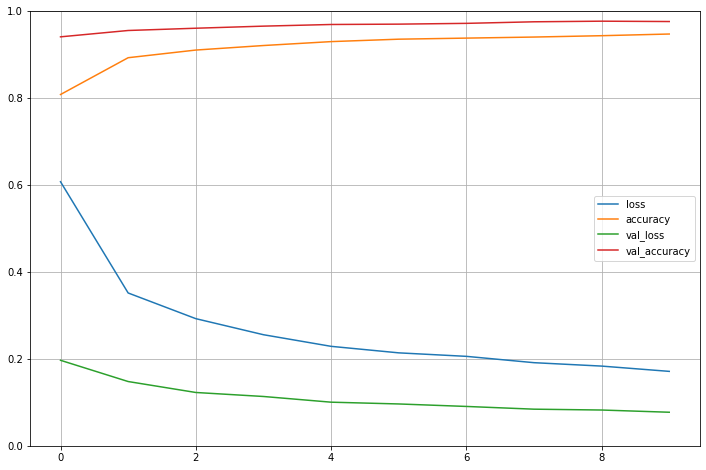

In [43]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

Save and upload your trained model to the seafile link we provided to you. You can upload it multiple times. We will consider only the newest uploaded model. 

In [44]:
model.save('FDS22-M081-MNIST.h5') # change the file name according to your repository name

## Load the model and evaluate it on the test data

In [45]:
model = keras.models.load_model("FDS22-M081-MNIST.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0759 - accuracy: 0.9765


[0.0758979320526123, 0.9764999747276306]

## Short report

Please write a few sentences explaining how you build and train the model. Please include the decisions you made, such as why you use x number layers and the difficulties you met. 

I started experimenting with a bit complex model, i.e., I started with 500 neurons in the first hidden layer. However, after some investigations, the complex model could have improved accuracy of the model. Thus, I removed the first layer and started with 300 neurons in the first hidden layer. 

To increase the speed of the training, I compared the SGD optimizer with the ADAM one. Unfortunately, adam-optimizer did not show better results, so I used  SGD. Also, I tried different sizes for the batch; the best one was 30 with ten epochs. Finally, I added a batch normalization layer to deal with the vanishing gradient problem. To avoid over-fitting, I tried three different techniques, starting with an l2 regularizer, then with l1, and finally with the dropout method. L2 regularizer performed well, but it was penalizing a lot, s.t; it took much work to reach the needed accuracy. In contrast, when adding an l1 regularizer, the model behaved exceptionally poorly, and the accuracy dropped below 0.15. Thus, I only used the dropout method, which worked well since the model generalizes well for unseen data. 
